# 4-5
# 對1993-2000年中國社會消費品零售總額序列進行確定性時序分析
data1.11.csv

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

## 计算季节指数

In [4]:
def caculateSeason(input, period):
    length = int(len(input)/period)
    output = [0]*period
    totalAverage = np.average(input)
    for i in range(0,period):
        for j in range(0,length):
            output[i] += input[i+j*period]/length/totalAverage
    return np.around(output,decimals=2)

## 消除序列季节指数影响

In [5]:
def removeSeason(series, season):
    length = int(len(series))
    period = int(len(season))
    output = [0]*length
    for i in range(0,length):
        output[i] = series[i]/season[i%period]
    return output

## 对序列增加季节指数影响

In [6]:
def plusSeason(series, season):
    length = int(len(series))
    period = int(len(season))
    output = [0]*length
    for i in range(0,length):
        output[i] = series[i]*season[i%period]
    return output

## 绘图

In [7]:
def drawer(input):
    plt.plot(input, '*-')
    plt.show()
    plt.close()

## 绘制对比图

In [9]:
def drawcompare(series, prediction):
    plt.plot(series, "*-", label='observe')
    plt.plot(prediction, "*", label='fittes')
    plt.legend()
    plt.show()
    plt.close()

## 开始分析

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     689.4
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           4.58e-45
Time:                        00:03:10   Log-Likelihood:                -654.41
No. Observations:                  96   AIC:                             1313.
Df Residuals:                      94   BIC:                             1318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        983.5601     45.933     21.413      0.0

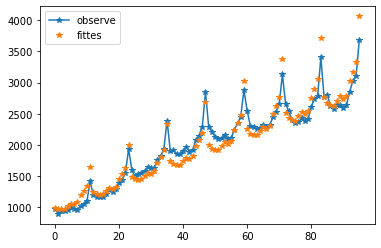

In [10]:
filename = "data1.11.csv"
series = pd.read_csv(filename, header=None)
series.iloc[:, 0] = series.iloc[:, 0].astype("float")
series = series.values[:, 0]
season = caculateSeason(series,12)
afterRemove = removeSeason(series,season)

x = np.arange(1, len(afterRemove) + 1)
model = sm.OLS(series, sm.add_constant(x))
model = model.fit()
print(model.summary())
prediction = model.predict(sm.add_constant(x))
prediction = plusSeason(prediction,season)
drawcompare(series, prediction)